In [ ]:
!pip install -r requirements.txt -q

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from HipJointDetector import HipJointDetector

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/taras-desktop/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Detect all results

In [2]:
detector = HipJointDetector("weights/segmentation.pt", 
                           "femur-head-segmentation/2",
                           "hip-joint-detection/2")


0: 640x640 1 big-hole, 2 bone-hollows, 336.6ms
Speed: 8.7ms preprocess, 336.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


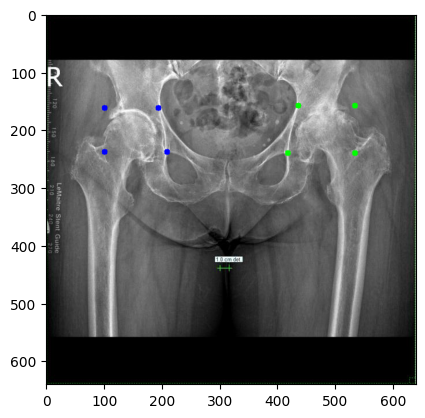

In [3]:
img, keypoints, cm = detector.get_keypoints('test_data/img1.jpg')

left_poins = [point for key, point in keypoints.items() if key.startswith('L')]
right_poins = [point for key, point in keypoints.items() if key.startswith('R')]

for point in left_poins:
    cv2.circle(img, tuple(point), 5, (0, 0, 255), -1)
for point in right_poins:
    cv2.circle(img, tuple(point), 5, (0, 255, 0), -1)

plt.imshow(img)


In [4]:
dataset = 'heap-dataset'
images = os.listdir(dataset)

In [5]:
with open('results.csv', 'w') as f:
    f.write('image;points;cm;side\n')
    for image in images:
        if image.endswith('.png'):
            try:
                img, keypoints, cm = detector.get_keypoints(f'{dataset}/{image}')
                left_poins = [point for key, point in keypoints.items() if key.startswith('L')]
                right_poins = [point for key, point in keypoints.items() if key.startswith('R')]
                str_left_poins = ",".join([f'[{point[0]},{point[1]}]' for point in left_poins])
                str_right_poins = ",".join([f'[{point[0]},{point[1]}]' for point in right_poins])
                f.write(f'\"{image}\";[{str_left_poins}];{cm};"left"\n')
                f.write(f'\"{image}\";[{str_right_poins}];{cm};"right"\n')
                for point in left_poins:
                    cv2.circle(img, tuple(point), 5, (0, 0, 255), -1)
                for point in right_poins:
                    cv2.circle(img, tuple(point), 5, (0, 255, 0), -1)
                cv2.imwrite(f'results/{image}', img)
                

            except Exception as e:
                print(f'Error: {e}')
                continue


0: 640x640 1 big-hole, 1 bone-hollow, 411.0ms
Speed: 4.7ms preprocess, 411.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 big-hole, 2 bone-hollows, 364.4ms
Speed: 2.6ms preprocess, 364.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 big-hole, 1 bone-hollow, 326.8ms
Speed: 2.6ms preprocess, 326.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Not enough 'small-hole' detections to draw tangent lines.
Error: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

0: 640x640 1 big-hole, 1 bone-hollow, 384.7ms
Speed: 2.3ms preprocess, 384.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 big-hole, 2 bone-hollows, 355.4ms
Speed: 3.1ms preprocess, 355.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Error: list index out of range

0: 640x640 1 big-hole, 2 bone-hollows, 420.5ms
Speed: 2.6m

In [6]:
import pandas as pd
df = pd.read_csv('results.csv', sep=';')
df

,image,points,cm,side
0,image_2024-10-04_09-21-45.png,"[[673,178],[673,297],[302,178],[353,297]]",31.2,left
1,image_2024-10-04_09-21-45.png,"[[811,178],[811,294],[660,178],[623,294]]",31.2,right
2,image_2024-10-04_09-12-06.png,"[[192,411],[192,535],[320,411],[356,535]]",28.0,left
3,image_2024-10-04_09-12-06.png,"[[755,380],[755,514],[620,380],[599,514]]",28.0,right
4,image_2024-10-04_09-25-25.png,"[[682,214],[682,322],[283,214],[301,322]]",32.0,left
...,...,...,...,...
67,image_2024-10-07_19-08-21.png,"[[306,276],[306,388],[655,276],[640,388]]",27.2,right
68,image_2024-10-04_09-10-45.png,"[[238,215],[238,318],[353,215],[375,318]]",27.2,left
69,image_2024-10-04_09-10-45.png,"[[743,208],[743,312],[625,208],[607,312]]",27.2,right
70,image_2024-10-07_19-06-34.png,"[[164,219],[164,339],[296,219],[315,339]]",29.6,left


In [ ]:
import time
for image in os.listdir('test_data/results'):
    img = cv2.imread(f'test_data/results/{image}')
    cv2.imwrite(f'test_data/detected_{image}.jpg', img)
    time.sleep(1)